<a href="https://colab.research.google.com/github/achaudhury7378/My-data/blob/master/Copy_of_Value_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def seed_cost(n,k):
  '''
  Cost of each seed user : no of user*k
  '''
  if n==0:
    return 0
  else:
    return n*k
def post_cost(eta,gam):
  '''
  Returns the cost of creating a post of attarctiveness (eta)
  gamma (gam) Cost parameter (> 1)
  '''
  return eta*gam

In [3]:
def q(n,eta):
    return np.exp(-n*eta)

In [4]:
def maximizerFunc(V,state,m,gam,V_0,mf):
  '''
  Each stage optimization problem of the Value Iteration for each state solved
  over number of seed users and eta

  Input :: The state we are calcualting for (state)
          Cost of each seed user : no of user*k
          Cost of making eeach post : attractiveness (eta)*gamma (gam)
          Current values for each state (V_0)
  Output :: Value for the particular state obtained solving the optimization problem
            The maximizer of the optimization problem or the actions optimal
  '''
  B=state[0]
  flag=state[1]
  p=0
  if flag==0:
    mx=0
    action=(0,0)
    for n in range(max_seed_user):#Loop ovee number of seed user
      temp=[]
      for i in BudgetList:
        if i<= B-seed_cost(n,m):#Saving only budgets that can be spend for attrectiveness after buying n seed user
          temp.append(i/gam)
      for eta in temp:#Loop over available budget for attarctiveness
        mn=1e4
        for i in BudgetList:#Finding the nearest available key in our storage
          if abs(i-B+seed_cost(n,m)+post_cost(eta,gam))<mn and i<B+seed_cost(n,m)+post_cost(eta,gam):
            mn=abs(i-B+seed_cost(n,m)+post_cost(eta,gam))
            p=i
        if mx<=-seed_cost(n,m)-post_cost(eta,gam)+lam*(1-q(mf,eta)**n)*V+lam*(q(mf,eta)**n)*V_0[(p,0)]:
          mx=-seed_cost(n,m)-post_cost(eta,gam)+lam*(1-q(mf,eta)**n)*V+lam*(q(mf,eta)**n)*V_0[(p,0)]
          action=(n,eta)
    if mx<=0 or action[1]==0 or action[0]==0:
      # If the value obtained is negative then there is no point in investing. 
      # Also if number of seed user is 0 
      # the investment for attrativeness (eta) makes no sense. 
      # Similarly if eta=0 there is no need to buy seed user
      return 0,(0,0)
    else:
      return mx,action
  elif flag==1:
    return V,(0,0)

In [5]:
def normCalc(V1,V2):
  '''
  Check the distance between sucessive iterates of Value Iteration
  
  Input :: Successive iterates from Value Iteration V1 and V2

  Output :: maximum absolute difference between the corresponding components

  '''
  mx=0
  for states in AllStates:
    if mx<abs(V1[states]-V2[states]):
      mx=abs(V1[states]-V2[states])
  return mx

In [6]:
def ValueIteration(V,Val_0,m,gam,ep,mf):
  '''
  Implementation of Value Iteration method

  Input :: list of values (Val_0), 
          Cost of each seed user : no of user*k
          Cost of making eeach post : attractiveness (eta)*gamma (gam)
          Tolerance (ep)

  Output :: Final values for each state (budget,flag) (V_0)
            Optimal decision for each state (action_state)
  '''
  V_1={}
  V_0=Val_0.copy()
  action_state={}
  for states in AllStates:
    V_1[states]=0
    action_state[states]=(0,0)
  while True:
    for states in AllStates:
      V_1[states],action_state[states]=maximizerFunc(V,states,m,gam,V_0,mf)
    if normCalc(V_1,V_0)<ep:
      break
    else:
      V_0=V_1.copy()
  return V_0,action_state

In [7]:
def Initialize(V,B,cd):
  '''
  Input :: Budget (B), number of elements between [0,B] (cd)
  Output :: 1. Initial Values Vals for each state i.e. (b,f) b is budget in [0,B] and f is flag 0/1
            2. All possible state (b,z) b is budget in [0,B] and f is flag 0/1
            3. BudgetList in [0,B] : 0 , delta , 2*delta, 3*delta,...,cd*delta(=B)
  '''
  BudgetList=np.linspace(0,B,cd)
  AllStates=[]
  for i in BudgetList:
    AllStates.append((i,1))
    AllStates.append((i,0))
  Vals={}# save for all B and eta pair for flag 0
  for i in BudgetList:
      Vals[(i,1)]=V
      Vals[(i,0)]=0
  return Vals,AllStates,BudgetList

In [8]:
V=1e10
B=70
p1=30
mf=30
gam=B
lam=1
ep=0.01
max_seed_user=3
Vals,AllStates,BudgetList=Initialize(V,B,int(B//1))
FinalV,FinalAct=ValueIteration(V,Vals,p1,gam,ep,mf)

In [9]:
states=list(FinalV.keys())
budgets=[]
etaList=[]
finalV=[]
seed_Users=[]
BudgetLeft=[]
for k in states:
    if k[1]==0:
        budgets.append(k[0])
        finalV.append(FinalV[k])
        seed_Users.append(FinalAct[k][0])
        BudgetLeft.append(k[0]-gam*FinalAct[k][1]-p1*FinalAct[k][0])
        etaList.append(FinalAct[k][1])

In [19]:
i=0
for k in states:
    if k[1]==0:
        print(f"Budget: {k[0]}, Optimal V:{FinalV[k]}, Optimal Seed:{FinalAct[k][0]}, Optimal eta:{FinalAct[k][1]} Budget Left:{BudgetLeft[i]}")
        i+=1

Budget: 0.0, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:0.0
Budget: 1.0144927536231885, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:1.0144927536231885
Budget: 2.028985507246377, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:2.028985507246377
Budget: 3.0434782608695654, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:3.0434782608695654
Budget: 4.057971014492754, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:4.057971014492754
Budget: 5.072463768115942, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:5.072463768115942
Budget: 6.086956521739131, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:6.086956521739131
Budget: 7.101449275362319, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:7.101449275362319
Budget: 8.115942028985508, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:8.115942028985508
Budget: 9.130434782608695, Optimal V:0, Optimal Seed:0, Optimal eta:0 Budget Left:9.130434782608695
Budget: 10.1449275362318

# Plots

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Values Obtained vs Budget')

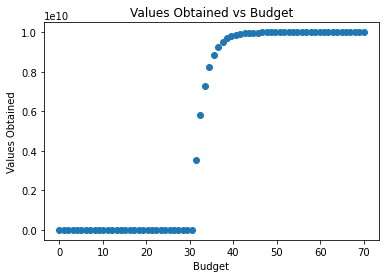

In [ ]:
plt.scatter(budgets,finalV)
plt.xlabel('Budget')
plt.ylabel('Values Obtained')
plt.title('Values Obtained vs Budget')

Text(0.5, 1.0, 'Eta vs Budget')

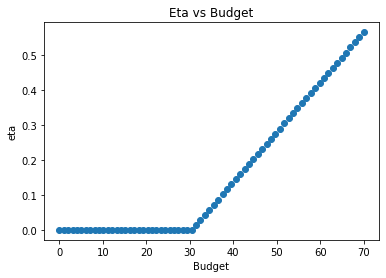

In [ ]:
plt.scatter(budgets,etaList)
plt.xlabel('Budget')
plt.ylabel('eta')
plt.title('Eta vs Budget')

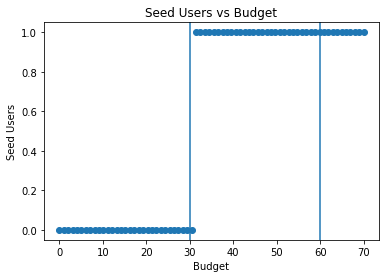

In [ ]:
plt.scatter(budgets,seed_Users)
plt.xlabel('Budget')
plt.ylabel('Seed Users')
plt.title('Seed Users vs Budget')
i=1
while True:
  plt.axvline(x=seed_cost(i,p1))
  i=i+1
  if seed_cost(i,p1)>B:
    break

Text(0.5, 1.0, 'Left vs Budget')

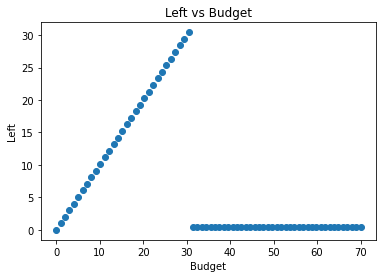

In [ ]:
plt.scatter(budgets,BudgetLeft)
plt.xlabel('Budget')
plt.ylabel('Left')
plt.title('Left vs Budget')